In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 기본값으로 설정 (처음 5개와 마지막 5개 행만 출력)
pd.reset_option('display.max_rows')

# 출력 포맷 설정 (소수점 4자리까지)
pd.options.display.float_format = '{:.4f}'.format

import platform
import seaborn as sns

import matplotlib.pyplot as plt

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


## 데이터 로드

In [2]:
# df = pd.read_csv('../data/5_데이터셋생성_재무.csv', dtype={'거래소코드' : 'object'})
train = pd.read_csv('../data/dataset/train.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')
test = pd.read_csv('../data/dataset/test.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')

X_train = pd.read_csv('../data/dataset/X_train.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')
X_test = pd.read_csv('../data/dataset/X_test.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')

y_train = pd.read_csv('../data/dataset/y_train.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')
y_test = pd.read_csv('../data/dataset/y_test.csv', dtype={'거래소코드' : 'object'}).set_index('거래소코드')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1187, 224), (198, 224), (1187, 1), (198, 1))

In [3]:
X_train.head()

,회사명,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,유동자산,재고자산,자본,매출액,매출원가,판매비와 관리비(물류원가 등 포함),기타(영업)비용,당기제조원가,급여,퇴직급여,상품매출원가,제품매출원가,감가상각비,대손상각비,개발비상각,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,외환차익2,외화환산이익2,외환차손2,외환환산손실2,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,(연차배당),(중간배당),배당금지급(-),단기차입금,매입채무 및 기타유동채무,매출채권 및 기타유동채권,비유동자산,사채,유동금융자산,유동부채,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,현금및현금성자산,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,종업원수,비유동부채,부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,년도차,자산_전기,자산증가율,유형자산_전기,유형자산증가율,유동자산_전기,유동자산증가율,재고자산_전기,재고자산증가율,자본_전기,자본증가율,매출액_전기,매출액증가율,자산평균,유형자산평균,무형자산_전기,무형자산평균,건설중인자산_전기,건설중인자산평균,토지_전기,토지평균,자본평균,총자산회전율,감가상각율,배당률,판관비체크,순외환손익대비매출액,매출원가대비매출액,당기총제조비용,재고조정중의고정비,고정비,총비용,변동비,변동비대비매출액,고정비대비매출액,인건비대비매출액,인건비대비영업총비용,1인당매출액,1인당인건비,재고자산평균,비유동자산_전기,비유동자산평균,매출채권 및 기타유동채권평균,장기매출채권 및 기타비유동채권평균,매입채무 및 기타유동채무평균,장기매입채무 및 기타비유동채무평균,주주이익(버핏),순운전자본(민식),유무형자산,영업현금흐름대비투하자본,ROTCE현금흐름대체,유형자산대비현금흐름,유무형자산대비현금흐름,매출대비고정자산,단기차입금_전기,단기차입금평균,장기차입금_전기,장기차입금평균,유동비율,현금비율,당좌비율,자기자본비율,비유동비율,부채비율,유동부채비율,비유동부채비율,비유동장기적합률,차입금의존도,매출채권대비매입채무,순운전자본,순운전자본대비총자본,차입금대비매출액,매출채권대비매입채무_before,영업활동현금흐름 대 총자산,영업활동현금흐름 대 매출액,투자안정성비율,영업활동현금흐름 대 투자활동현금지출,경영자산회전율분모,매출채권,매입채무,차입금,경영자산회전율분모_전기,매출채권_전기,매입채무_전기,차입금_전기,부채_전기,자본금_전기,영업활동현금흐름 대 총부채,자기자본회전율,자본금회전율,경영자산회전율,비유동자산회전율,유형자산회전율,재고자산회전율,매출채권회전율,매입채무회전율,차입금 대 매출액,시가총액,상장주식수,배당수익률,DATE,DGS10,DGS1,DGS6MO,T10Y2Y,WTI_oil,Dubai_oil,realGDP_usa,real_PCE,Core_PCE,CPI_sticky,Core_CPI,manuf_PMI(R),non_manuf_PMI(R),manuf_GB,non_manuf_GB,Equip_inv,TB_rtn(1y),TB_rtn(10y),IR_sm,DXY,CB_spread(AA-),CB_spread(BBB-),경제고통지수,경상수지,수입금액지수,수입물량지수,수출금액지수,수출물량지수,미국수입금액,중국수입금액,미국수출금액,중국수출금액,실업률,실업률_증감,소비자물가상승률,근원물가상승률,근원물가상승률_식품에너지제외,GDP_growth,CLI(경기선행),CCI(경기동행),NSI(=뉴스심리지수),기업실사BSI_실적,기업실사BSI_전망,year,month,매출액정상영업이익률,매출액순이익률,매출액총이익률,총자본순이익률,총자본사업이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률
거래소코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000040,케이알모터스(주),2012/12,1976/05/25,NaN,2012,1976,1,119327267.0000,55810192.0000,61684604.0000,24763334.0000,60797171.0000,97926654.0000,92177389.0000,11948008.0000,0.0000,0.0000,2579833.0000,350950.0000,0.0000,0.0000,35985.0000,1248799.0000,0.0000,650714.0000,155998.0000,0.0000,470896.0000,1310924.0000,0.0000,0.0000,0.0000,0.0000,1118203.0000,0.0000,42542501.0000,3884892.0000,7235571.0000,12088682.0000,0.0000,0.0000,0.0000,-0.0000,10401663.0000,28964045.0000,26201155.0000,57642663.0000,0.0000,100000.0000,43762954.0000,0.0000,407646.0000,342768.0000,0.0000,10236751.0000,-4565749.0000,937241.0000,42700.0000,0.0000,249.0000,14767142.0000,58530096.0000,937241.0000,21084.0000,992041.0000,464863.0000,59670690.0000,0.0000,-6198743.0000,-6.4700,1.0000,133337774.0000,-10.5075,57761033.0000,-3.3774,73022140.0000,-15.5262,24384487.0000,1.5536,68764654.0000,-11.5866,127720215.0000,-23.3272,126332520.5000,56785612.5000,1804381.0000,1461292.0000,0.0000,0.0000,42542501.0000,42542501.0000,64780912.5000,0.7752,0.0972,-0.0000,True,-13.6075,94.1290,14842806.0000,7635041.5537,11035931.0537,104125397.0000,93089465.9463,95.0604,11.2696,2.9928,24.5295,393280.0000,10361.0000,24573910.5000,60315635.0000,58979149.0000,26201155.0000,342768.0000,28964045.0000,407646.0000,-4858991.0000,51117833.5000,58246904.5000,0.0000,0.0000,0.0000,0.0000,0.0000,10304725.0000,10353194.0000,0.0000,0.0000,140.9516,23.3914,23.6199,50.9499,94.8114,96.2711,71.9819,24.2892,76.2829,8.7169,90.3725,17921650.0000,15.0189,10.5724,90.3725,0.0000,0.0000,0.0000,0.0000,119327267.0000,26543923.0000,29371691.0000,10401663.0000,133337774.0000,33214201.0000,35842471.0000,10304725.0000,64573121.0000,59670690.0000,0.0000,1.5117,1.6411,0.7752,1.6604,1.7245,3.9850,3.2774,3.0032,10.5724,58954641.2260,119341379.0000,-0.0000,2012-12-01,1.7274,0.1675,0.1282,1.4629,94.2008,3.3083,2.2891,1.3673,1.8500,-139.7270,0.7093,50.7000,56.1000,1,1,-9.

In [4]:
X_test.head()

,회사명,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,유동자산,재고자산,자본,매출액,매출원가,판매비와 관리비(물류원가 등 포함),기타(영업)비용,당기제조원가,급여,퇴직급여,상품매출원가,제품매출원가,감가상각비,대손상각비,개발비상각,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,외환차익2,외화환산이익2,외환차손2,외환환산손실2,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,(연차배당),(중간배당),배당금지급(-),단기차입금,매입채무 및 기타유동채무,매출채권 및 기타유동채권,비유동자산,사채,유동금융자산,유동부채,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,현금및현금성자산,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,종업원수,비유동부채,부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,년도차,자산_전기,자산증가율,유형자산_전기,유형자산증가율,유동자산_전기,유동자산증가율,재고자산_전기,재고자산증가율,자본_전기,자본증가율,매출액_전기,매출액증가율,자산평균,유형자산평균,무형자산_전기,무형자산평균,건설중인자산_전기,건설중인자산평균,토지_전기,토지평균,자본평균,총자산회전율,감가상각율,배당률,판관비체크,순외환손익대비매출액,매출원가대비매출액,당기총제조비용,재고조정중의고정비,고정비,총비용,변동비,변동비대비매출액,고정비대비매출액,인건비대비매출액,인건비대비영업총비용,1인당매출액,1인당인건비,재고자산평균,비유동자산_전기,비유동자산평균,매출채권 및 기타유동채권평균,장기매출채권 및 기타비유동채권평균,매입채무 및 기타유동채무평균,장기매입채무 및 기타비유동채무평균,주주이익(버핏),순운전자본(민식),유무형자산,영업현금흐름대비투하자본,ROTCE현금흐름대체,유형자산대비현금흐름,유무형자산대비현금흐름,매출대비고정자산,단기차입금_전기,단기차입금평균,장기차입금_전기,장기차입금평균,유동비율,현금비율,당좌비율,자기자본비율,비유동비율,부채비율,유동부채비율,비유동부채비율,비유동장기적합률,차입금의존도,매출채권대비매입채무,순운전자본,순운전자본대비총자본,차입금대비매출액,매출채권대비매입채무_before,영업활동현금흐름 대 총자산,영업활동현금흐름 대 매출액,투자안정성비율,영업활동현금흐름 대 투자활동현금지출,경영자산회전율분모,매출채권,매입채무,차입금,경영자산회전율분모_전기,매출채권_전기,매입채무_전기,차입금_전기,부채_전기,자본금_전기,영업활동현금흐름 대 총부채,자기자본회전율,자본금회전율,경영자산회전율,비유동자산회전율,유형자산회전율,재고자산회전율,매출채권회전율,매입채무회전율,차입금 대 매출액,시가총액,상장주식수,배당수익률,DATE,DGS10,DGS1,DGS6MO,T10Y2Y,WTI_oil,Dubai_oil,realGDP_usa,real_PCE,Core_PCE,CPI_sticky,Core_CPI,manuf_PMI(R),non_manuf_PMI(R),manuf_GB,non_manuf_GB,Equip_inv,TB_rtn(1y),TB_rtn(10y),IR_sm,DXY,CB_spread(AA-),CB_spread(BBB-),경제고통지수,경상수지,수입금액지수,수입물량지수,수출금액지수,수출물량지수,미국수입금액,중국수입금액,미국수출금액,중국수출금액,실업률,실업률_증감,소비자물가상승률,근원물가상승률,근원물가상승률_식품에너지제외,GDP_growth,CLI(경기선행),CCI(경기동행),NSI(=뉴스심리지수),기업실사BSI_실적,기업실사BSI_전망,year,month,매출액정상영업이익률,매출액순이익률,매출액총이익률,총자본순이익률,총자본사업이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률
거래소코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000220,(주)유유제약,2021/12,1975/11/18,NaN,2021,1975,1,192985288.0000,79672548.0000,98887922.0000,25225284.0000,128685078.0000,115655485.0000,70320100.0000,44135217.0000,0.0000,0.0000,18100075.0000,1576646.0000,0.0000,0.0000,1554899.0000,420183.0000,0.0000,376077.0000,138045.0000,16707.0000,91580.0000,6453.0000,0.0000,0.0000,0.0000,0.0000,4087102.0000,3454434.0000,30380371.0000,58802695.0000,36540363.0000,30719555.0000,2667637.0000,1851214.0000,0.0000,1851214.0000,8200000.0000,16597823.0000,22505324.0000,94097366.0000,30000000.0000,287706.0000,30014749.0000,1835310.0000,134566.0000,2065206.0000,3704640.0000,50263468.0000,4508661.0000,6073221.0000,677678.0000,4008281.0000,341.0000,34285461.0000,64300209.0000,6073221.0000,19364.0000,8016694.0000,1884608.0000,20201681.0000,3260266.0000,1200168.0000,0.5500,1.0000,154901007.0000,24.5862,77107137.0000,3.3271,64466555.0000,53.3941,23688893.0000,6.4857,117036441.0000,9.9530,98119846.0000,17.8717,173943147.5000,78389842.5000,3785501.0000,3936301.5000,202800.0000,1828617.0000,30380371.0000,30380371.0000,122860759.5000,0.6649,2.2942,1.5068,True,0.1285,60.8014,62257039.0000,1274190.0695,13463709.5695,114455317.0000,100991607.4305,87.3211,11.6412,17.0132,44.5828,339166.0000,53079.0000,24457088.5000,90434452.0000,92265909.0000,22505324.0000,2065206.0000,16597823.0000,134566.0000,-311262.0000,49027618.5000,82326144.0000,0.0343,0.0319,0.0575,0.0548,0.0489,3000000.0000,5600000.0000,5539950.0000,4622295.0000,329.4644,167.4626,168.4211,66.6813,73.1222,49.9671,23.3242,26.6429,57.7389,22.6649,146.8441,68873173.0000,35.6883,8.8386,146.8441,2.3363,3.8984,74.4758,73.5257,186270588.0000,24570530.0000,16732389.0000,11904640.0000,151986118.0000,21343537.0000,11554678.0000,8539950.0000,37864566.0000,9709632.0000,8.8263,0.9414,7.7332,0.6838,1.2535,1.4754,4.7289,5.0379,8.1773,8.8386,134584661.3100,17232351.0000,1.3755,2021-12-01,1.3914,0.1000,0.0615,1.136

In [5]:
y_train.head()

,label
거래소코드,
000040,0.0000
000050,1.0000
000070,1.0000
000150,1.0000
000180,0.0000


In [6]:
y_test.head()

,label
거래소코드,
000220,0.0000
000250,1.0000
000390,1.0000
000430,0.0000
000440,0.0000


## 불필요 컬럼 제외

In [7]:
# for col in df.columns:
#     print(col)

cols_info = [
    '회사명', '회계년도'
]
    
cols_info_drop = ['상장일', '상장폐지일',
    '결산년도', '상장년도', '년도차', 'year', 'month', 'DATE'
]
cols_drop = ['판관비체크', '매출채권대비매입채무_before', '배당률', '차입금 대 매출액']
cols_labeling = ['이자보상배율']
cols_before = [col for col in X_train.columns if col.endswith('_전기')]
cols_mean = [col for col in X_train.columns if col.endswith('평균')]

cols_nonfeature = cols_info_drop + cols_drop + cols_labeling + cols_before + cols_mean

In [8]:
# 후보피처 아닌 컬럼 제거
train = train.drop(columns = cols_nonfeature)
test = test.drop(columns = cols_nonfeature)

X_train = X_train.drop(columns = cols_nonfeature)
X_test = X_test.drop(columns = cols_nonfeature)

train.shape, test.shape, X_train.shape, X_test.shape

((1187, 180), (198, 180), (1187, 179), (198, 179))

In [9]:
# 유일값이 1개인 컬럼 확인

cols_count1 = []
for col in train.columns:
    if train[col].nunique()==1:
        cols_count1.append(col)

cols_count1

['외환차익2', '외화환산이익2', '외환차손2', '외환환산손실2', 'non_manuf_GB']

In [10]:
# 유일값이 1개인 컬럼 제거
train = train.drop(columns = cols_count1)
test = test.drop(columns = cols_count1)

X_train = X_train.drop(columns = cols_count1)
X_test = X_test.drop(columns = cols_count1)

train.shape, test.shape, X_train.shape, X_test.shape

((1187, 175), (198, 175), (1187, 174), (198, 174))

In [11]:
# 불필요 컬럼 제거
cols_drop_feature = ['(연차배당)', '(중간배당)', '경영자산회전율분모', '상장주식수']

# 불필요 컬럼 제거
train = train.drop(columns = cols_drop_feature)
test = test.drop(columns = cols_drop_feature)

X_train = X_train.drop(columns = cols_drop_feature)
X_test = X_test.drop(columns = cols_drop_feature)

train.shape, test.shape, X_train.shape, X_test.shape

((1187, 171), (198, 171), (1187, 170), (198, 170))

In [12]:
# 범주형 변수
# cols_cate = ['manuf_GB', 'non_manuf_GB', 'market']
cols_cate = ['manuf_GB', 'market']

# 연속형 변수
cols_num = X_train.drop(columns=cols_cate+cols_info).columns

X_train.shape, len(cols_cate), len(cols_num), len(cols_info)

((1187, 170), 2, 166, 2)

In [13]:
for i, col in enumerate(X_train.columns):
    print(i, col)

0 회사명
1 회계년도
2 market
3 자산
4 유형자산
5 유동자산
6 재고자산
7 자본
8 매출액
9 매출원가
10 판매비와 관리비(물류원가 등 포함)
11 기타(영업)비용
12 당기제조원가
13 급여
14 퇴직급여
15 상품매출원가
16 제품매출원가
17 감가상각비
18 대손상각비
19 개발비상각
20 기타무형자산상각비
21 외환차익1
22 외화환산이익1
23 외환차손1
24 외화환산손실1
25 무형자산
26 건설중인자산
27 토지
28 자본잉여금
29 이익잉여금(결손금)
30 미처분이익잉여금(결손금)
31 기타임의적립금
32 배당금지급(-)
33 단기차입금
34 매입채무 및 기타유동채무
35 매출채권 및 기타유동채권
36 비유동자산
37 사채
38 유동금융자산
39 유동부채
40 유동성장기부채
41 장기매입채무 및 기타비유동채무
42 장기매출채권 및 기타비유동채권
43 장기차입금
44 현금및현금성자산
45 영업활동으로 인한 현금흐름
46 유형자산의 증가
47 무형자산의 증가
48 연구개발비
49 종업원수
50 비유동부채
51 부채
52 유형자산의증가
53 유형자산의감소
54 (투자활동으로 인한 현금유출액)
55 투자활동으로 인한 현금유입액
56 자본금
57 관계기업 등 지분관련 투자자산
58 영업손익
59 자산증가율
60 유형자산증가율
61 유동자산증가율
62 재고자산증가율
63 자본증가율
64 매출액증가율
65 총자산회전율
66 감가상각율
67 순외환손익대비매출액
68 매출원가대비매출액
69 당기총제조비용
70 재고조정중의고정비
71 고정비
72 총비용
73 변동비
74 변동비대비매출액
75 고정비대비매출액
76 인건비대비매출액
77 인건비대비영업총비용
78 1인당매출액
79 1인당인건비
80 주주이익(버핏)
81 순운전자본(민식)
82 유무형자산
83 영업현금흐름대비투하자본
84 ROTCE현금흐름대체
85 유형자산대비현금흐름
86 유무형자산대비현금흐름
87 매출대비고정자산
88 유동비율
89 현금비율
90 당좌비율
91 자기자본비율
92 비유동비

In [14]:
cols_num

Index(['자산', '유형자산', '유동자산', '재고자산', '자본', '매출액', '매출원가',
       '판매비와 관리비(물류원가 등 포함)', '기타(영업)비용', '당기제조원가',
       ...
       '기업실사BSI_실적', '기업실사BSI_전망', '매출액정상영업이익률', '매출액순이익률', '매출액총이익률',
       '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률'],
      dtype='object', length=166)

## 이상치 처리 : 윈저라이징

In [15]:
##### 윈터라이징
from scipy.stats.mstats import winsorize
import numpy as np

# # 하위 1%, 상위 1%를 각각 1%, 99% 백분위 값으로 대체)
# # 각 열에 대해 윈저라이징 적용
# cop_concat_winsorized = cop_concat.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

# 하위 1%, 상위 1%를 각각 1%, 99% 백분위 값으로 대체)
# 각 열에 대해 윈저라이징 적용
X_train_winsorized_ul_2 = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))
X_train_winsorized_ul_2.shape

# 하위 0.5%, 상위 0.5%를 각각 0.5%, 99.5% 백분위 값으로 대체)
# 각 열에 대해 윈저라이징 적용
X_train_winsorized_ul_1 = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0.005, 0.005]))
X_train_winsorized_ul_1.shape

# 하위 1% -> 1% 백분위값으로 대체
X_train_winsorized_l = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0.01, 0]))
X_train_winsorized_l.shape

# 상위 1% -> 99% 백분위값으로 대체
X_train_winsorized_u = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0, 0.01]))
X_train_winsorized_u.shape

# 하위 0.25%, 상위 0.75%를 각각 0.25%, 99.25% 백분위 값으로 대체)
X_train_winsorized_ul1_u = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0.0025, 0.0075]))
X_train_winsorized_ul1_u.shape

# 하위 0.75%, 상위 0.25%를 각각 0.75%, 99.75% 백분위 값으로 대체)
X_train_winsorized_ul1_l = X_train[cols_num].apply(lambda x: winsorize(x, limits=[0.0075, 0.0025]))
X_train_winsorized_ul1_l.shape

(1187, 166)

In [16]:
len(cols_num), cols_num

# with open('cols_num.txt', 'w') as f:
#     # 리스트의 각 요소를 파일에 쓰기
#     f.write(str(cols_num.tolist()))
#     # for item in cols_num:
#     #     f.write('%s, ' % item)

(166,
 Index(['자산', '유형자산', '유동자산', '재고자산', '자본', '매출액', '매출원가',
        '판매비와 관리비(물류원가 등 포함)', '기타(영업)비용', '당기제조원가',
        ...
        '기업실사BSI_실적', '기업실사BSI_전망', '매출액정상영업이익률', '매출액순이익률', '매출액총이익률',
        '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률'],
       dtype='object', length=166))

In [17]:
cols_num[-10:]

Index(['기업실사BSI_실적', '기업실사BSI_전망', '매출액정상영업이익률', '매출액순이익률', '매출액총이익률',
       '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률'],
      dtype='object')

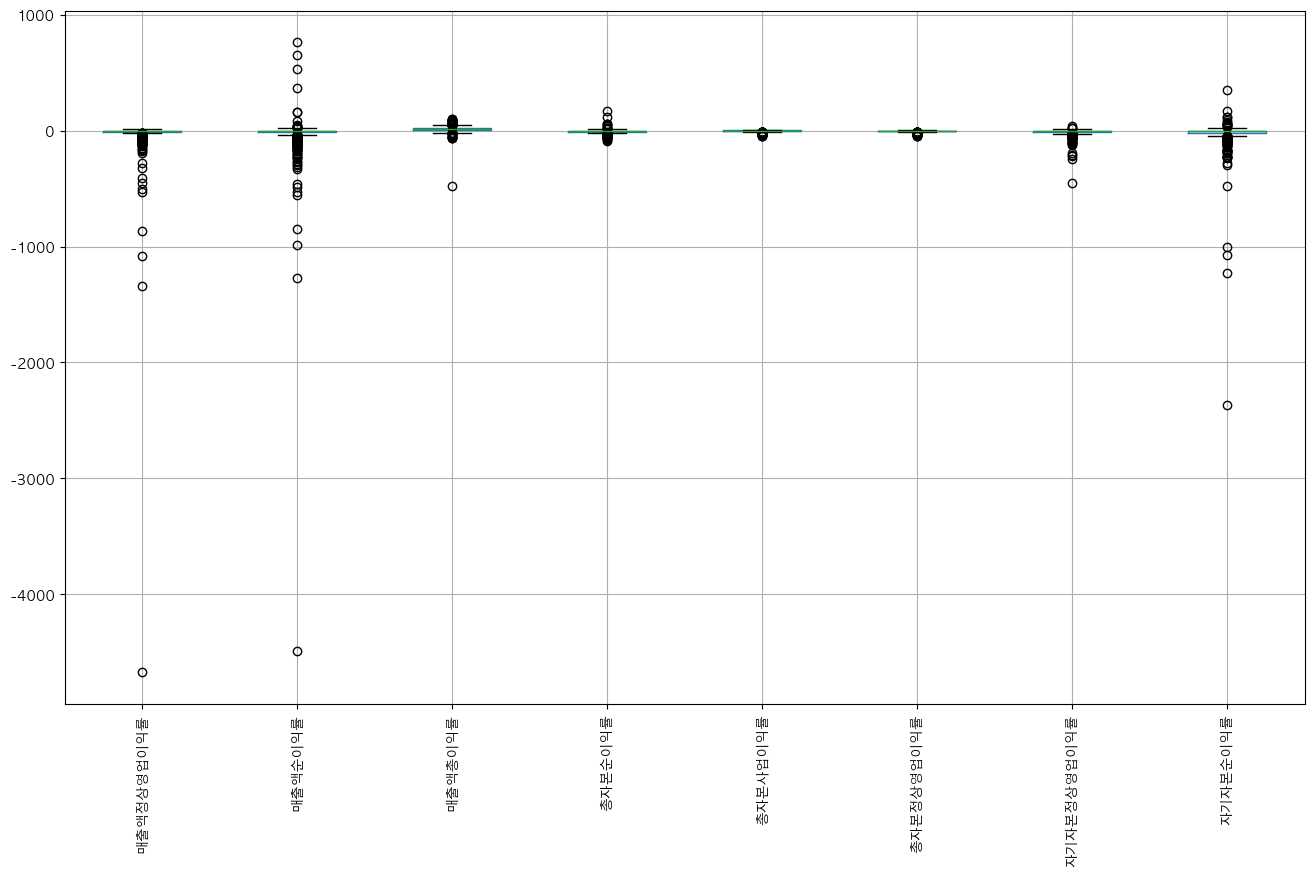

In [18]:
plt.figure(figsize=(16, 9))
X_train[cols_num[-8:]].boxplot()
plt.xticks(rotation=90)
plt.show()

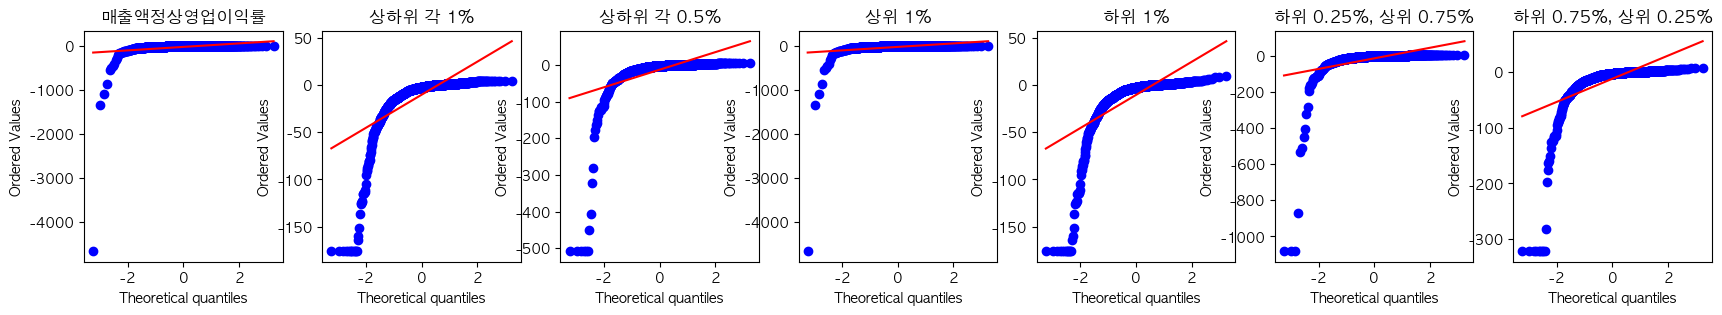

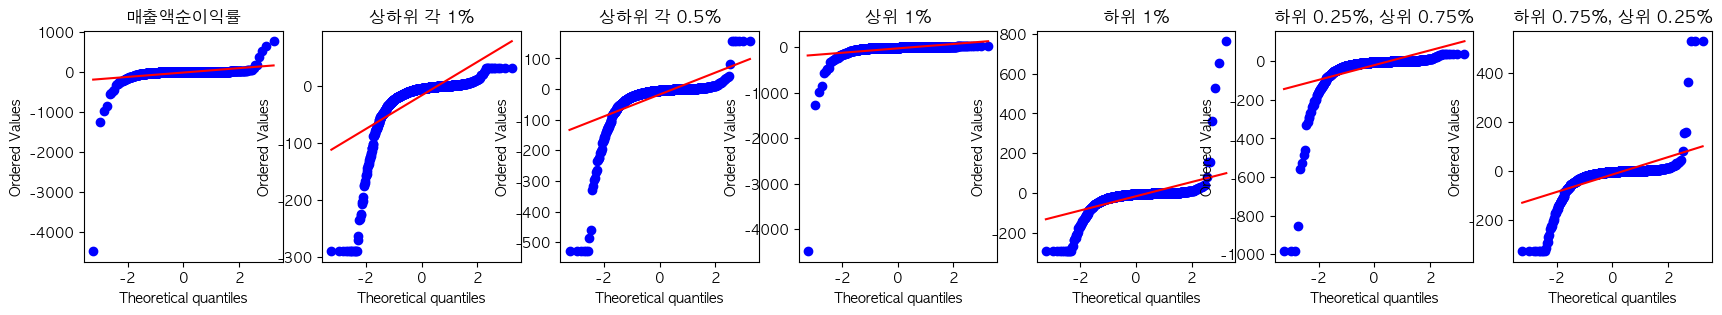

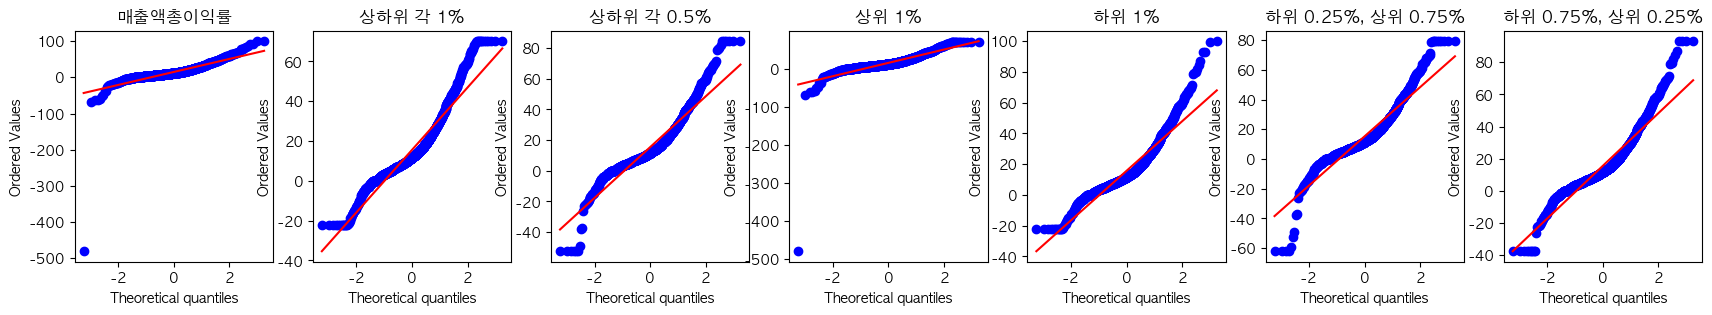

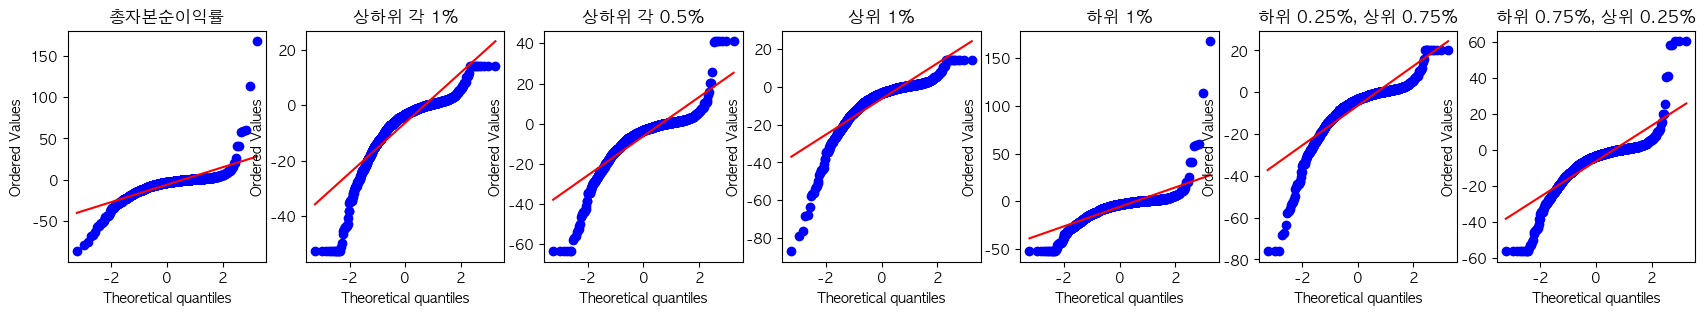

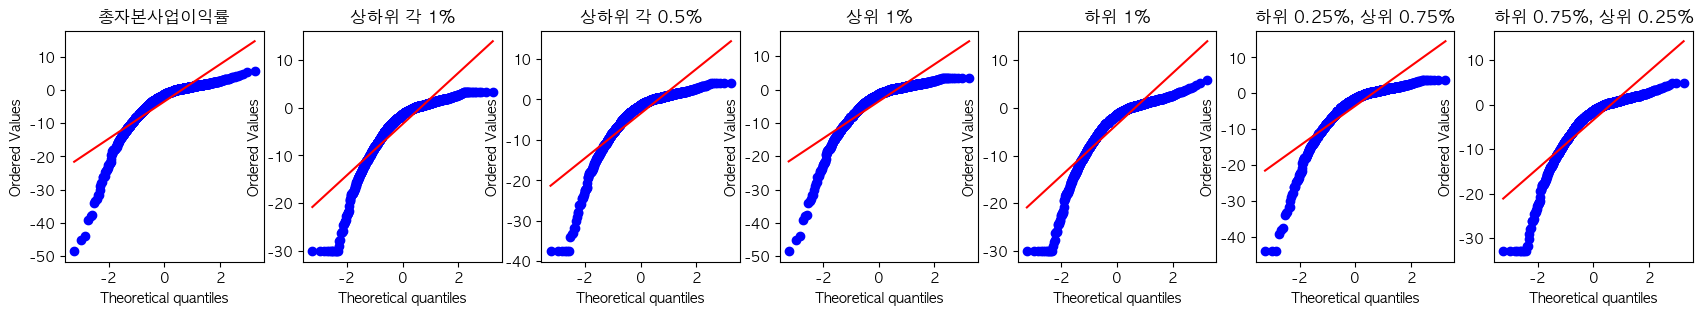

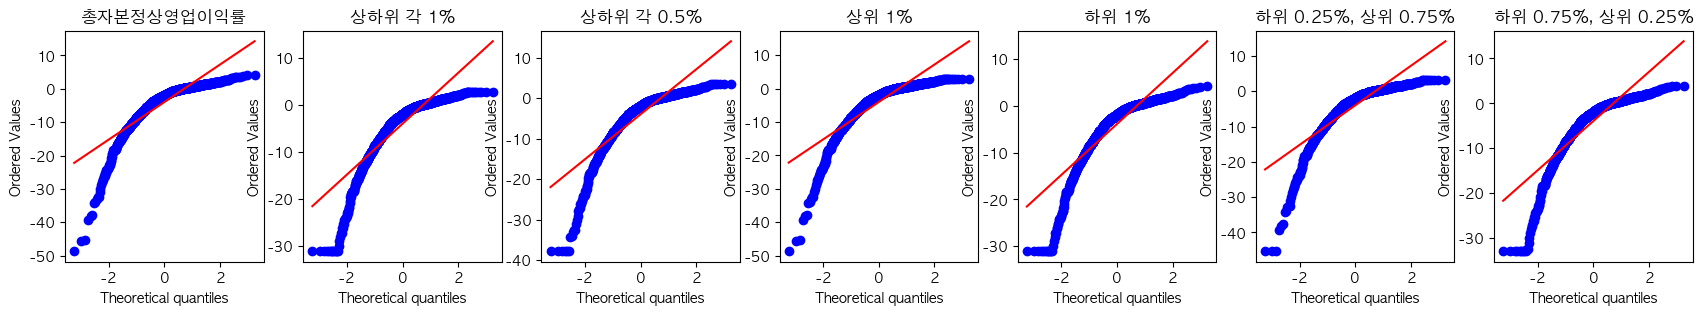

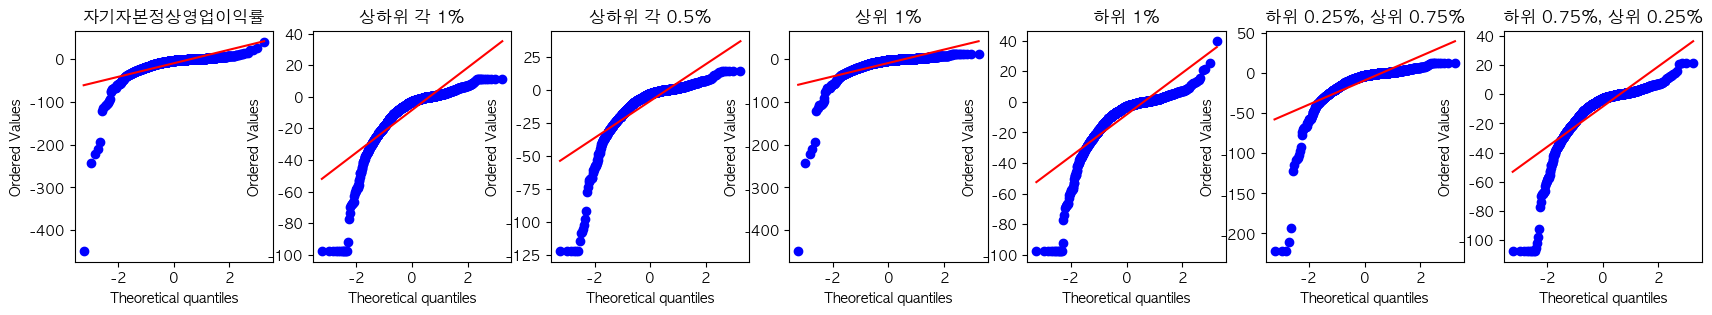

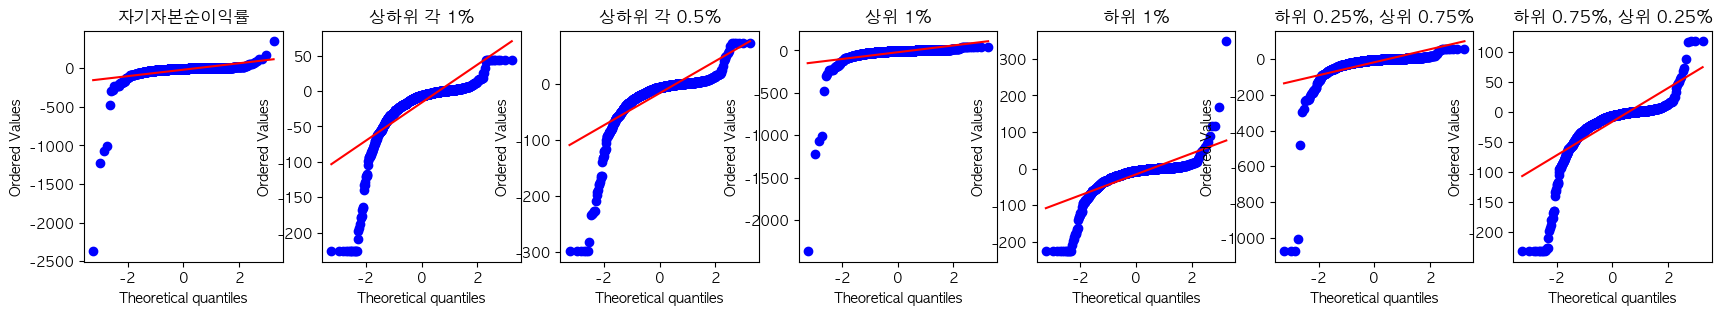

In [19]:
""" QQ plot 시각화 """

import scipy.stats as stats

## histogram
col_n = 2
row_n = 8
# row_n = len(cols_num)

# fig, ax = plt.subplots(ncols=col_n, nrows=row_n)

for i, col in enumerate(cols_num[-8:]):
    fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(21, 3))
    
    stats.probplot(X_train[col],dist=stats.norm, plot=ax[0])
    ax[0].set_title(col)

    stats.probplot(X_train_winsorized_ul_2[col],dist=stats.norm, plot=ax[1])
    ax[1].set_title('상하위 각 1%')

    stats.probplot(X_train_winsorized_ul_1[col],dist=stats.norm, plot=ax[2])
    ax[2].set_title('상하위 각 0.5%')

    stats.probplot(X_train_winsorized_u[col],dist=stats.norm, plot=ax[3])
    ax[3].set_title('상위 1%')

    stats.probplot(X_train_winsorized_l[col],dist=stats.norm, plot=ax[4])
    ax[4].set_title('하위 1%')

    stats.probplot(X_train_winsorized_ul1_u[col],dist=stats.norm, plot=ax[5])
    ax[5].set_title('하위 0.25%, 상위 0.75%')

    stats.probplot(X_train_winsorized_ul1_l[col],dist=stats.norm, plot=ax[6])
    ax[6].set_title('하위 0.75%, 상위 0.25%')

    plt.show()

In [20]:
# 수익성 지표 추가 완료

# 상위 1%
cols_upper = ['자산', '유형자산', '유동자산', '재고자산', '자본', '매출액', '매출원가', '판매비와 관리비(물류원가 등 포함)', '당기제조원가', \
            '급여', '퇴직급여', '감가상각비', '대손상각비', '기타무형자산상각비', '외환차익1', '외화환산이익1', '외환차손1','외화환산손실1',\
            '무형자산', '건설중인자산', '토지', '자본잉여금','기타임의적립금','단기차입금',\
            '매입채무 및 기타유동채무', '매출채권 및 기타유동채권','매입채무 및 기타유동채무', '매출채권 및 기타유동채권', '비유동자산',\
            '사채', '유동금융자산', '유동부채', '유동성장기부채', '장기매입채무 및 기타비유동채무', '장기매출채권 및 기타비유동채권', \
            '장기차입금', '현금및현금성자산', '유형자산의 증가', '무형자산의 증가', '연구개발비', '종업원수', '비유동부채', '부채', \
            '유형자산의증가', '유형자산의감소', '(투자활동으로 인한 현금유출액)', '투자활동으로 인한 현금유입액', '자본금', \
            '관계기업 등 지분관련 투자자산', '자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '매출액증가율',\
            '총자산회전율', '감가상각율', '당기총제조비용','재고조정중의고정비', '고정비','총비용', '변동비','변동비대비매출액',\
            '고정비대비매출액', '인건비대비매출액','1인당매출액', '1인당인건비', '순운전자본(민식)', '유무형자산', '영업현금흐름대비투하자본',\
            'ROTCE현금흐름대체',  '유형자산대비현금흐름',  '유무형자산대비현금흐름','매출대비고정자산', '유동비율', '현금비율', '당좌비율', \
            '비유동비율', '부채비율', '유동부채비율', '비유동부채비율', '비유동장기적합률', '매출채권대비매입채무','순운전자본대비총자본', \
            '차입금대비매출액', '영업활동현금흐름 대 총자산', '영업활동현금흐름 대 매출액', '투자안정성비율', \
            '영업활동현금흐름 대 투자활동현금지출', '매출채권', '매입채무', '차입금', '영업활동현금흐름 대 총부채', '자기자본회전율', \
            '자본금회전율', '경영자산회전율', '비유동자산회전율', '유형자산회전율', '재고자산회전율', '매출채권회전율', '매입채무회전율',\
            '시가총액', '배당수익률', '배당금지급(-)']

# # 하위 1%
cols_lower = ['매출액정상영업이익률', '자기자본정상영업이익률'] 

# 하위 0.75%, 상위 0.25%, 
cols_ul1_l = [ '영업손익' ]

# 하위 0.25% , 상위 0.75%
cols_ul1_u = ['이익잉여금(결손금)', '미처분이익잉여금(결손금)', '영업활동으로 인한 현금흐름','자본증가율','매출원가대비매출액', \
             '인건비대비영업총비용' ] 

# 하위 0.5%, 상위 0.5%
cols_ul1 = [ '순외환손익대비매출액',  '순운전자본', '매출액순이익률', '매출액총이익률', '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본순이익률']

# 하위 1%, 상위 1%
cols_ul2 = [ '주주이익(버핏)']

# 안함
nothing = ['자기자본비율',  '차입금의존도', 'DGS10', 'DGS1', 'DGS6MO', 'T10Y2Y', 'WTI_oil', 'Dubai_oil', 'realGDP_usa', 'real_PCE',\
           'Core_PCE', 'CPI_sticky', 'Core_CPI', 'manuf_PMI(R)', 'non_manuf_PMI(R)', 'Equip_inv', 'TB_rtn(1y)', 'TB_rtn(10y)', \
           'IR_sm', 'DXY', 'CB_spread(AA-)', 'CB_spread(BBB-)', '경제고통지수', '경상수지', '수입금액지수', '수입물량지수', \
            '수출금액지수', '수출물량지수', '미국수입금액', '중국수입금액', '미국수출금액', '중국수출금액', '실업률', '실업률_증감',\
            '소비자물가상승률', '근원물가상승률', '근원물가상승률_식품에너지제외', 'GDP_growth', 'CLI(경기선행)', 'CCI(경기동행)',\
             'NSI(=뉴스심리지수)', '기업실사BSI_실적', '기업실사BSI_전망']

# 0이 너무 많아서 확인해봐야 함
zero_feature = ['기타(영업)비용', '상품매출원가', '제품매출원가', '개발비상각']

In [21]:
# drop
print(X_train[(X_train[zero_feature]>0).any(axis=1)][zero_feature].shape)

X_train[zero_feature].describe()

(25, 4)


,기타(영업)비용,상품매출원가,제품매출원가,개발비상각
count,1187.0000,1187.0000,1187.0000,1187.0000
mean,34529.1045,2832171.5307,7423.3117,1956.1137
std,815976.3142,95632422.1177,209021.9148,48473.6016
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0000,0.0000
max,24492000.0000,3294623000.0000,6961213.0000,1550924.0000


In [22]:
# 0이 너무 많아서 확인해봐야 함 -> drop
zero_feature = ['기타(영업)비용', '상품매출원가', '제품매출원가', '개발비상각']

train.drop(columns = zero_feature)
X_train.drop(columns = zero_feature, inplace=True)
X_test.drop(columns = zero_feature, inplace=True)

X_train.shape, X_test.shape

((1187, 166), (198, 166))

In [23]:
##### 윈터라이징
from scipy.stats.mstats import winsorize
import numpy as np

X_train_winsorized = X_train.copy()
# X_train_winsorized[cols_lower] = X_train_winsorized_l[cols_lower] # 하위 1%
X_train_winsorized[cols_ul1_l] = X_train_winsorized_ul1_l[cols_ul1_l] # 하위 0.75%, 상위 0.25%
X_train_winsorized[cols_ul1_u] = X_train_winsorized_ul1_u[cols_ul1_u] # 하위 0.25% , 상위 0.75%
X_train_winsorized[cols_ul1] = X_train_winsorized_ul_1[cols_ul1] # 하위 0.5%, 상위 0.5%
X_train_winsorized[cols_ul2] = X_train_winsorized_ul_2[cols_ul2] # 하위 1%, 상위 1%

# error 발생
for col in cols_upper:
    X_train_winsorized[col] = X_train_winsorized_u[col] # 상위 1%

In [24]:
# # 파일로 저장

# print(X_train_winsorized.shape)
# X_train_winsorized.to_csv('../data/dataset/X_train_winsorized.csv')

## 스케일링

In [25]:
cols_info = ['회사명', '회계년도']

cols_eco = [
  'DGS10', 'DGS1', 'DGS6MO', 'T10Y2Y', 'WTI_oil', 'Dubai_oil', 'realGDP_usa', 'real_PCE',
  'Core_PCE', 'CPI_sticky', 'Core_CPI', 'manuf_PMI(R)', 'non_manuf_PMI(R)', 'Equip_inv', 'TB_rtn(1y)', 'TB_rtn(10y)', 
  'IR_sm', 'DXY', 'CB_spread(AA-)', 'CB_spread(BBB-)', '경제고통지수', '경상수지', '수입금액지수', '수입물량지수', 
  '수출금액지수', '수출물량지수', '미국수입금액', '중국수입금액', '미국수출금액', '중국수출금액', '실업률', '실업률_증감',
  '소비자물가상승률', '근원물가상승률', '근원물가상승률_식품에너지제외', 'GDP_growth', 'CLI(경기선행)', 'CCI(경기동행)',
  'NSI(=뉴스심리지수)', '기업실사BSI_실적', '기업실사BSI_전망'
]

cols_non_log = [
  '자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자본증가율', '매출액증가율',
  '총자산회전율', '배당수익률', '감가상각율','순외환손익대비매출액', '매출원가대비매출액', 
  '변동비대비매출액', '고정비대비매출액', '인건비대비매출액', '인건비대비영업총비용',
  '영업현금흐름대비투하자본', 'ROTCE현금흐름대체', 
  '유형자산대비현금흐름', '유무형자산대비현금흐름', '매출대비고정자산', 
  '유동비율', '현금비율','당좌비율', '자기자본비율', '비유동비율', '부채비율', '유동부채비율', '비유동부채비율', '비유동장기적합률',
  '차입금의존도', '매출채권대비매입채무', '순운전자본대비총자본', '차입금대비매출액', 
  '영업활동현금흐름 대 총부채','자기자본회전율','자본금회전율',
  '경영자산회전율','비유동자산회전율','유형자산회전율','재고자산회전율','매출채권회전율','매입채무회전율',
  '영업활동현금흐름 대 투자활동현금지출', '영업활동현금흐름 대 총자산','영업활동현금흐름 대 매출액','종업원수',
  '매출액정상영업이익률', '매출액순이익률', '매출액총이익률', '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률'
]

cols_cate = ['manuf_GB', 'market'] # 범주형 변수

# 로그스케일링
cols_log = [col for col in X_train_winsorized.columns if col not in cols_info + cols_eco + cols_non_log + cols_cate]

# # minmax 스케일링
# cols_mm = cols_non_log

# # standard 스케일링
# cols_std = cols_non_log

# # robust 스케일링
# cols_rb = cols_non_log

In [26]:
X_train_winsorized.shape[1], len(cols_info), len(cols_eco), len(cols_non_log), len(cols_cate), len(cols_log)

(166, 2, 41, 54, 2, 67)

In [27]:
# 음수나 0이 포함되어 로그스케일링 불가한 변수
cols_can_log = [col for col in cols_log if X_train_winsorized[col].min()>0]
cols_cant_log = [col for col in cols_log if X_train_winsorized[col].min()<=0]

print('로그 스케일링 대상 피처 수:', len(cols_log))
print('로그 스케일링 피처 수:', len(cols_can_log))
print('로그 불가한 피처 수:', len(cols_cant_log))

X_train_winsorized[cols_cant_log].describe()

로그 스케일링 대상 피처 수: 67
로그 스케일링 피처 수: 22
로그 불가한 피처 수: 45


,재고자산,자본,매출원가,당기제조원가,퇴직급여,감가상각비,대손상각비,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,배당금지급(-),단기차입금,매입채무 및 기타유동채무,사채,유동금융자산,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,비유동부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,관계기업 등 지분관련 투자자산,영업손익,재고조정중의고정비,주주이익(버핏),순운전자본,투자안정성비율,매입채무,차입금
count,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000
mean,59219176.4642,261333901.2502,447225194.8037,8923130.3951,1274977.4423,2031403.4347,2290471.7380,744265.1634,1520339.5114,965646.8618,1371254.0396,1068841.9056,19756695.4608,18488879.6243,57381798.9621,73742692.1988,118490471.5653,32846268.6773,45591213.8804,2522847.4920,77148786.7228,108352631.8349,56058114.2763,28154698.2468,51028712.9343,5120586.5004,5181445.4280,63500140.2359,12145817.7414,29710376.2064,2328502.2965,4072606.3117,180588321.3092,29706712.8382,3217497.7043,86243606.6992,54144185.4853,25202197.2679,-8938984.3665,42888178.6663,-19787056.4170,3892328.1171,378.2064,114903865.7515,143922488.3690
std,191148944.0852,876271410.8521,1467140602.3992,38819727.7915,3657034.0324,6992515.5335,10223937.4435,2556383.0668,6551865.6767,4765661.7783,5983426.0994,5629173.6706,89190781.2222,81060436.8470,172508516.7620,178128640.9157,517323702.6588,207611928.8692,234394646.6532,10771690.9687,236139775.6574,404632100.4826,275431423.2930,89919547.1470,210392576.2841,25083071.5889,24839868.5692,256246778.0067,114226474.2468,106836337.9517,7852425.9889,16051845.8799,752453449.6658,106837235.8067,11832636.6321,241994257.1549,145986413.3576,108826205.3597,49789492.2469,147725360.0070,82129848.9452,296955809.0229,1445.7098,421439498.2334,473607261.2033
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-7974117.0000,-1230053799.0000,-1256160824.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-683994631.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-16470662.0000,-4014688.0000,0.0000,-410811000.0000,0.0000,-577617388.0000,-2110664105.0000,0.0000,0.0000,0.0000
25%,4039535.0000,31462667.0000,26850577.0000,0.0000,183285.5000,143607.0000,0.0000,8118.0000,0.0000,0.0000,0.0000,0.0000,754879.5000,0.0000,3019649.0000,12143517.0000,-2734458.5000,-6372591.0000,0.0000,-0.0000,2683351.5000,4921898.5000,0.0000,1204007.0000,0.0000,0.0000,0.0000,0.0000,-4174355.5000,860161.5000,18712.0000,0.0000,3673407.0000,860161.5000,6404.0000,7283018.0000,2980428.0000,0.0000,-6324990.5000,1279175.6635,-13804859.0000,-6453029.0000,0.0000,5240820.5000,4813809.0000
50%,12686741.0000,58136371.0000,67592993.0000,0.0000,364930.0000,344024.0000,93275.0000,98639.0000,0.0000,0.0000,0.0000,0.0000,2143912.0000,410989.0000,10756523.0000,25373223.0000,17845972.0000,8398760.0000,0.0000,0.0000,14913102.0000,13435302.0000,0.0000,4733514.0000,1025000.0000,114321.0000,165404.0000,3346974.0000,364202.0000,3700639.0000,279666.0000,452585.0000,11906810.0000,3696334.0000,85000.0000,19015635.0000,9360399.0000,94608.0000,-2043245.0000,5702494.0887,-4218433.0000,9943954.0000,10.1402,14109464.0000,21760844.0000
75%,33831303.0000,130865019.0000,227454403.5000,0.0000,849036.5000,1030762.5000,704340.0000,451827.0000,264246.5000,109811.5000,244358.5000,75090.0000,6645487.0000,5168402.5000,29938149.0000,55795062.5000,60601227.0000,36737978.5000,1614806.5000,951365.0000,50391749.5000,40949184.5000,5000000.0000,15025000.0000,10000000.0000,846964.5000,1210403.5000,18312478.0000,7489266.0000,15721062.5000,1351619.5000,2224515.5000,37267330.0000,15721062.5000,905891.0000,52173739.0000,31224926.0

In [28]:
len(cols_log)

67

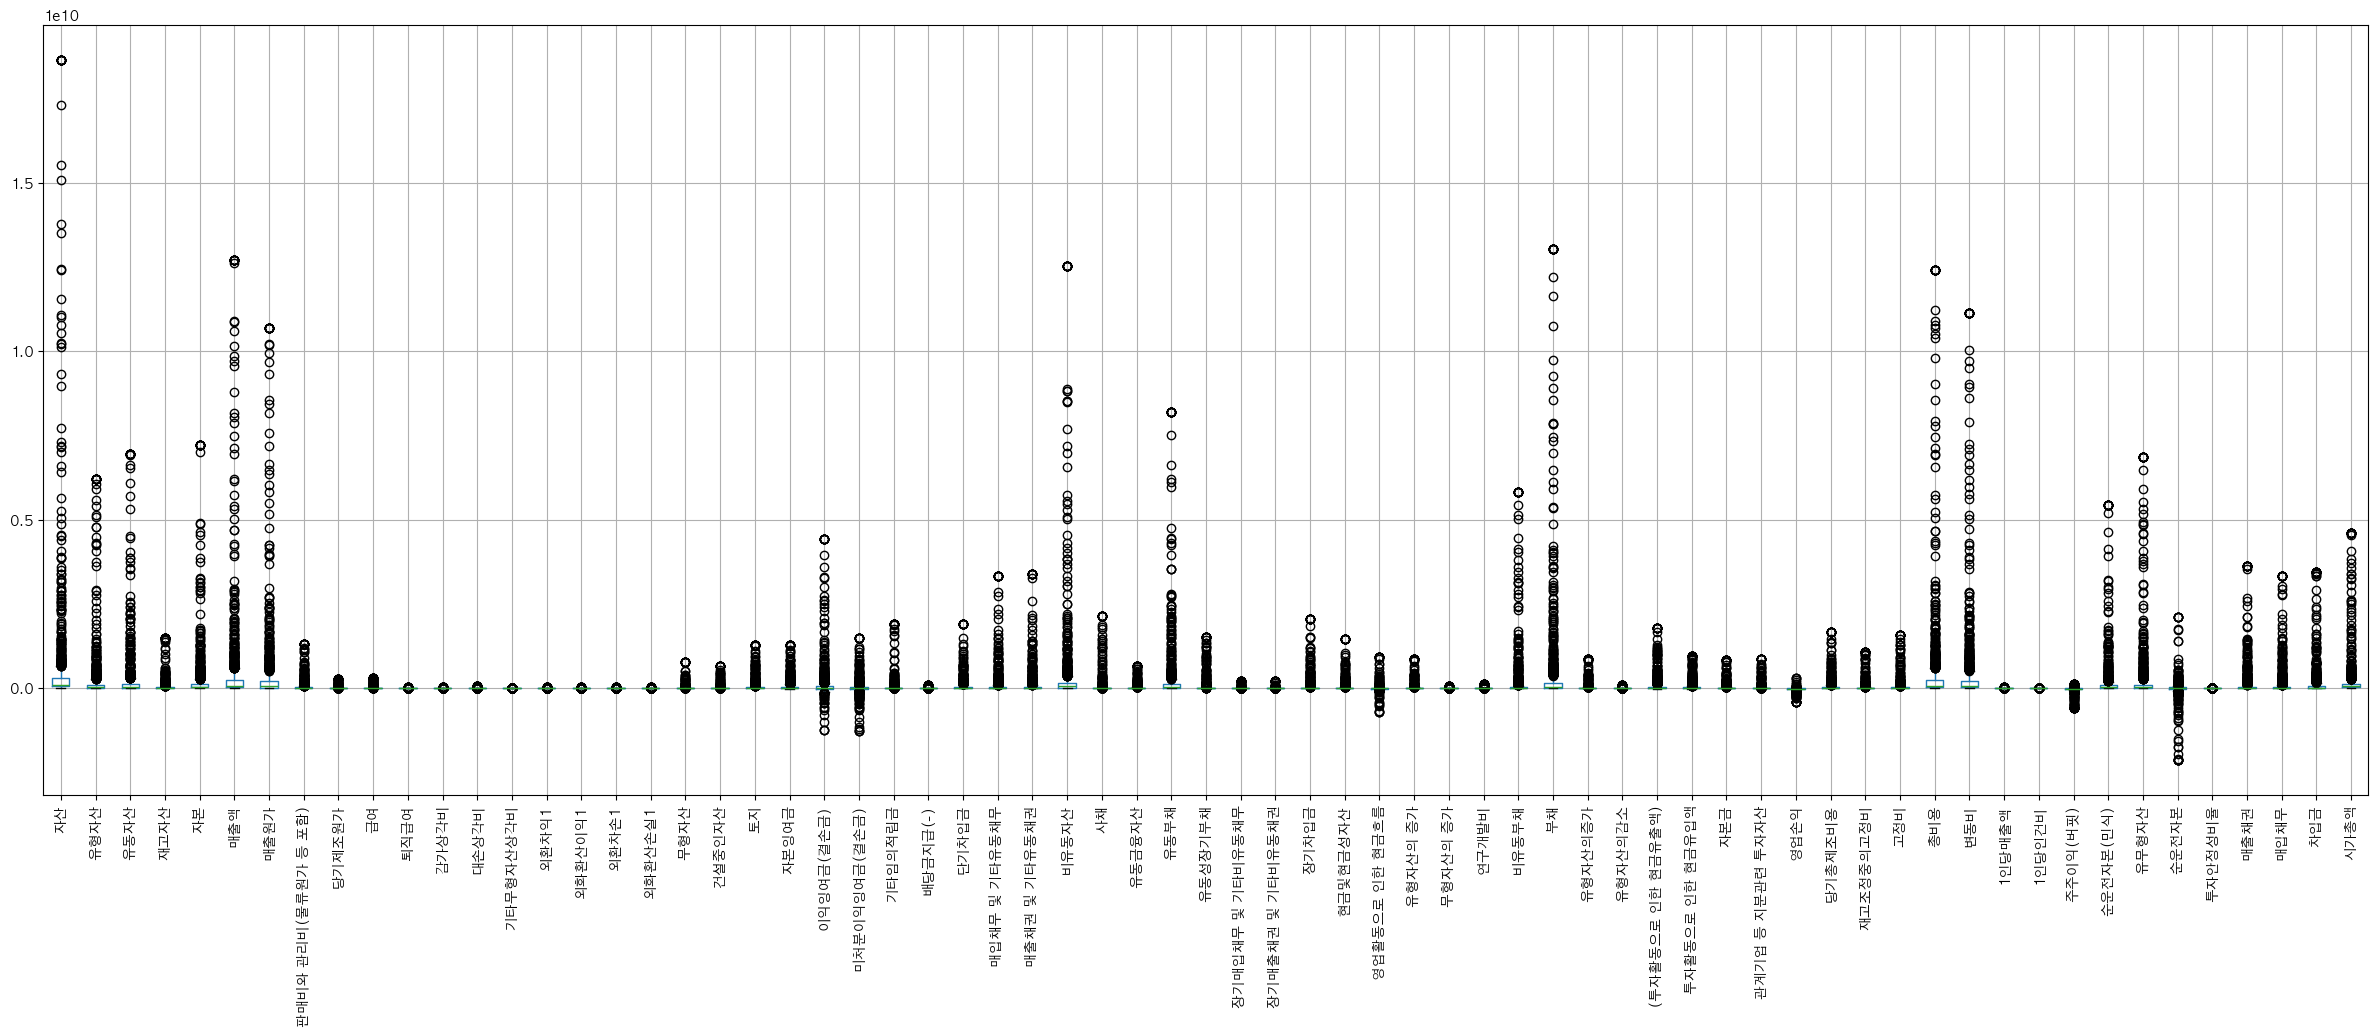

In [29]:
plt.figure(figsize=(30, 10))
X_train_winsorized[cols_log].boxplot()

plt.xticks(rotation=90)
plt.show()

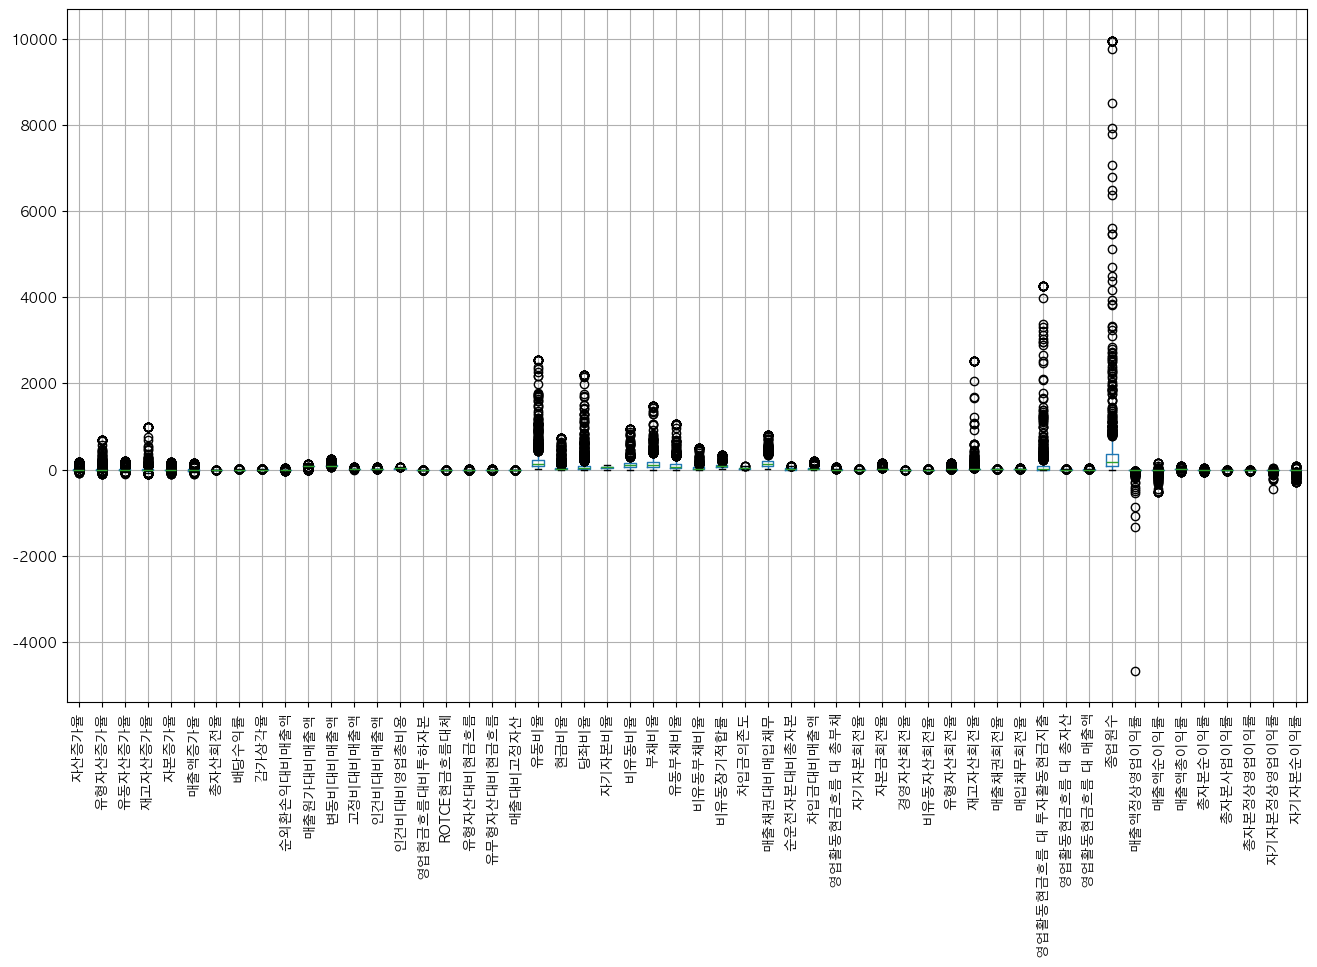

In [30]:
plt.figure(figsize=(16, 9))

X_train_winsorized[cols_non_log].boxplot()
plt.xticks(rotation=90)
plt.show()

### 데이터프레임 카피 : `X_scaled`

1. 로그 스케일링 : 0 초과 양수에 대해서만 적용
2. 나머지 변수 스케일링 : 일괄 적용

In [31]:
X_train_scaled = X_train_winsorized.copy()
X_test_scaled = X_test.copy()

### log : `cols_log`

In [32]:
print(cols_can_log)

['자산', '유형자산', '유동자산', '매출액', '판매비와 관리비(물류원가 등 포함)', '급여', '매출채권 및 기타유동채권', '비유동자산', '유동부채', '현금및현금성자산', '부채', '자본금', '당기총제조비용', '고정비', '총비용', '변동비', '1인당매출액', '1인당인건비', '순운전자본(민식)', '유무형자산', '매출채권', '시가총액']


In [33]:
(X_train_winsorized[cols_can_log]).describe()

,자산,유형자산,유동자산,매출액,판매비와 관리비(물류원가 등 포함),급여,매출채권 및 기타유동채권,비유동자산,유동부채,현금및현금성자산,부채,자본금,당기총제조비용,고정비,총비용,변동비,1인당매출액,1인당인건비,순운전자본(민식),유무형자산,매출채권,시가총액
count,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000
mean,717243335.0000,245032138.4676,284207798.8509,525231739.9099,60584086.2965,14518415.7237,116056399.6125,422638257.8930,287454057.0607,45389607.5619,465399319.1104,35609847.1660,75250392.0413,62165847.6941,531912113.2233,468850774.7770,1205477.5535,47184.4212,190746324.6420,263348576.1453,123235696.0497,215621710.4399
std,2438221547.0015,850353268.0475,923030771.5071,1721314228.7040,172356407.1801,40009495.0588,411007318.0237,1545646538.5888,1025354301.1567,170826055.9882,1699111497.5822,108074962.1794,214660269.1272,208965970.7979,1718351465.4572,1515120014.9280,3739795.5710,118528.9032,668872064.0261,911067245.2337,442298850.1431,616768209.0139
min,6411002.0000,24258.0000,1795390.0000,128541.0000,1112375.0000,110733.0000,19630.0000,170634.0000,136431.0000,1528.0000,565325.0000,2680.0000,1677169.0000,322139.3261,3969780.0000,3483503.5000,2623.0000,958.0000,66396.5000,85254.0000,19630.0000,4107099.4200
25%,60481780.5000,12429764.5000,28576487.0000,35518966.0000,7457318.0000,2204917.0000,7361096.0000,26849525.5000,14958736.0000,2792741.5000,22344379.5000,5000000.0000,9585854.5000,4813061.6450,39892379.0000,34343960.5272,271751.0000,14679.5000,14089891.7500,15854537.5000,7771106.5000,35174755.2900
50%,117287112.0000,36370359.0000,57191824.0000,84575176.0000,14432663.0000,3947126.0000,18470673.0000,60002877.0000,42339992.0000,7478039.0000,56805351.0000,8968161.0000,18498122.0000,10765358.5791,88209299.0000,78870561.6049,478276.0000,23628.0000,34989578.0000,40185107.0000,19231075.0000,67086787.7050
75%,298486865.5000,115287518.0000,137092114.5000,260307542.0000,36194048.0000,9548124.5000,49216274.0000,166204976.5000,123332283.0000,19453787.0000,163355250.5000,20543929.5000,45911806.5000,29515684.8954,262916837.5000,232567554.4433,915212.5000,39344.0000,91857323.7500,118016642.0000,49936717.0000,129905328.3100
max,18648693000.0000,6218617025.0000,6948839134.0000,12719636524.0000,1317803816.0000,297436000.0000,3382579536.0000,12526917000.0000,8201884224.0000,1465499030.0000,13035846228.0000,843290170.0000,1683909816.0000,1573949312.8986,12422443030.0000,11143422618.0175,35072028.0000,1100285.0000,5442174500.0000,6876512500.0000,3637200000.0000,4625193827.1500


In [43]:
cols_can_log

['자산',
 '유형자산',
 '유동자산',
 '매출액',
 '판매비와 관리비(물류원가 등 포함)',
 '급여',
 '매출채권 및 기타유동채권',
 '비유동자산',
 '유동부채',
 '현금및현금성자산',
 '부채',
 '자본금',
 '당기총제조비용',
 '고정비',
 '총비용',
 '변동비',
 '1인당매출액',
 '1인당인건비',
 '순운전자본(민식)',
 '유무형자산',
 '매출채권',
 '시가총액']

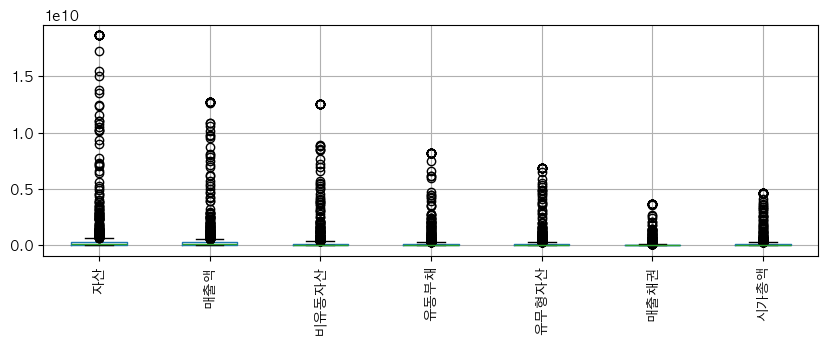

In [45]:
plt.figure(figsize=(10, 3))
X_train_winsorized[['자산', '매출액', '비유동자산', '유동부채', '유무형자산', '매출채권', '시가총액']].boxplot()
# plt.title('로그스케일링 전')
plt.xticks(rotation=90)
plt.show()

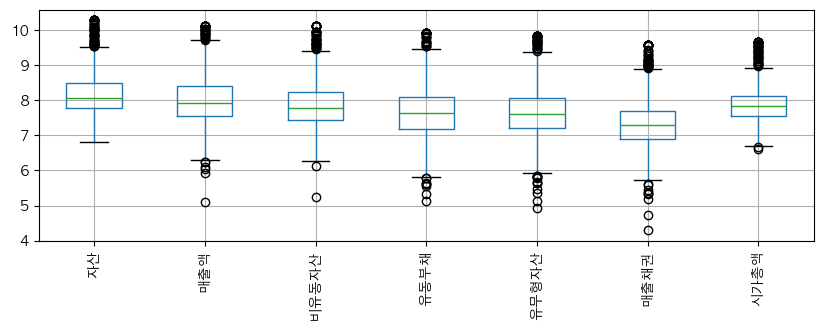

In [46]:
# 로그 스케일링 (상용로그)
X_train_scaled[cols_can_log] = X_train_scaled[cols_can_log].apply(np.log10)
X_test_scaled[cols_can_log] = X_test_scaled[cols_can_log].apply(np.log10)

plt.figure(figsize=(10, 3))
X_train_scaled[['자산', '매출액', '비유동자산', '유동부채', '유무형자산', '매출채권', '시가총액']].boxplot()
# X_train_scaled[cols_can_log].boxplot()
plt.xticks(rotation=90)
plt.show()

In [45]:
# ## winsorizing + log 데이터 저장
# X_train_scaled.to_csv('../data/dataset/X_train_winsozired_scaled_log.csv')
# X_test_scaled.to_csv('../data/dataset/X_test_scaled_log.csv')

### log 안할 피처

In [47]:
cols_scaling = cols_eco + cols_non_log + cols_cant_log
len(cols_scaling)

140

In [48]:
print('총 피처 수:', X_train_scaled.shape[1])
len(cols_info) + len(cols_cate) + len(cols_can_log) + len(cols_scaling)

총 피처 수: 166


166

In [49]:
X_train[cols_info]

,회사명,회계년도
거래소코드,,
000040,케이알모터스(주),2012/12
000050,(주)경방,2012/12
000070,(주)삼양홀딩스,2013/12
000150,(주)두산,2015/12
000180,성창기업지주(주),2012/12
...,...,...
900130,웨이포트유한공사,2012/12
900140,엘브이엠씨홀딩스(주),2018/12
950130,(주)엑세스바이오인코퍼레이션,2015/12


### standard : `cols_std`

In [50]:
X_train_scaled.shape, X_test_scaled.shape

((1187, 166), (198, 166))

In [51]:
len(cols_scaling)

140

In [52]:
len(cols_info), len(cols_can_log), len(cols_cate)

(2, 22, 2)

In [53]:
from sklearn.preprocessing import StandardScaler

# 데이터프레임 복사
cols_std = cols_scaling

X_train_scaled_std = X_train_scaled.copy()
X_test_scaled_std = X_test_scaled.copy()

scaler_std = StandardScaler()
scaler_std.fit(X_train_scaled[cols_std])

X_train_scaled_std[cols_std] = scaler_std.transform(X_train_scaled[cols_std])
X_test_scaled_std[cols_std] = scaler_std.transform(X_test_scaled[cols_std])

In [54]:
cols_scaling[-10:]

['(투자활동으로 인한 현금유출액)',
 '투자활동으로 인한 현금유입액',
 '관계기업 등 지분관련 투자자산',
 '영업손익',
 '재고조정중의고정비',
 '주주이익(버핏)',
 '순운전자본',
 '투자안정성비율',
 '매입채무',
 '차입금']

In [55]:
cols_non_log[-10:]

['영업활동현금흐름 대 매출액',
 '종업원수',
 '매출액정상영업이익률',
 '매출액순이익률',
 '매출액총이익률',
 '총자본순이익률',
 '총자본사업이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률']

In [ ]:
['자산증가율', '자본증가율', '']

In [56]:
cols_non_log

['자산증가율',
 '유형자산증가율',
 '유동자산증가율',
 '재고자산증가율',
 '자본증가율',
 '매출액증가율',
 '총자산회전율',
 '배당수익률',
 '감가상각율',
 '순외환손익대비매출액',
 '매출원가대비매출액',
 '변동비대비매출액',
 '고정비대비매출액',
 '인건비대비매출액',
 '인건비대비영업총비용',
 '영업현금흐름대비투하자본',
 'ROTCE현금흐름대체',
 '유형자산대비현금흐름',
 '유무형자산대비현금흐름',
 '매출대비고정자산',
 '유동비율',
 '현금비율',
 '당좌비율',
 '자기자본비율',
 '비유동비율',
 '부채비율',
 '유동부채비율',
 '비유동부채비율',
 '비유동장기적합률',
 '차입금의존도',
 '매출채권대비매입채무',
 '순운전자본대비총자본',
 '차입금대비매출액',
 '영업활동현금흐름 대 총부채',
 '자기자본회전율',
 '자본금회전율',
 '경영자산회전율',
 '비유동자산회전율',
 '유형자산회전율',
 '재고자산회전율',
 '매출채권회전율',
 '매입채무회전율',
 '영업활동현금흐름 대 투자활동현금지출',
 '영업활동현금흐름 대 총자산',
 '영업활동현금흐름 대 매출액',
 '종업원수',
 '매출액정상영업이익률',
 '매출액순이익률',
 '매출액총이익률',
 '총자본순이익률',
 '총자본사업이익률',
 '총자본정상영업이익률',
 '자기자본정상영업이익률',
 '자기자본순이익률']

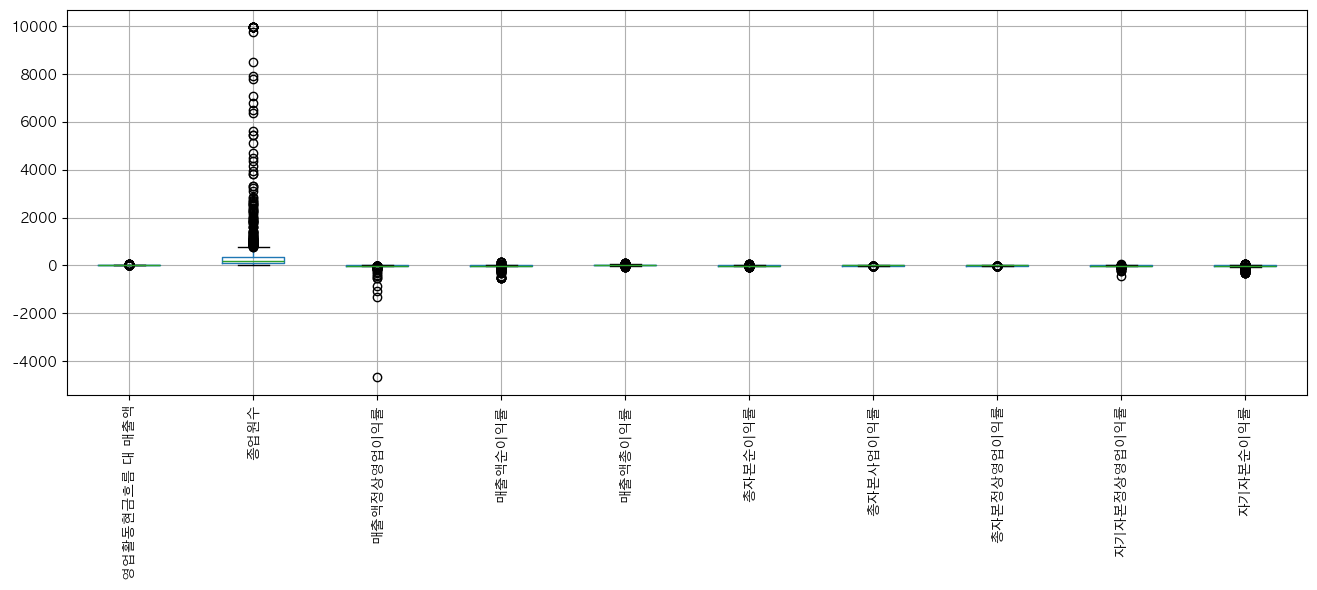

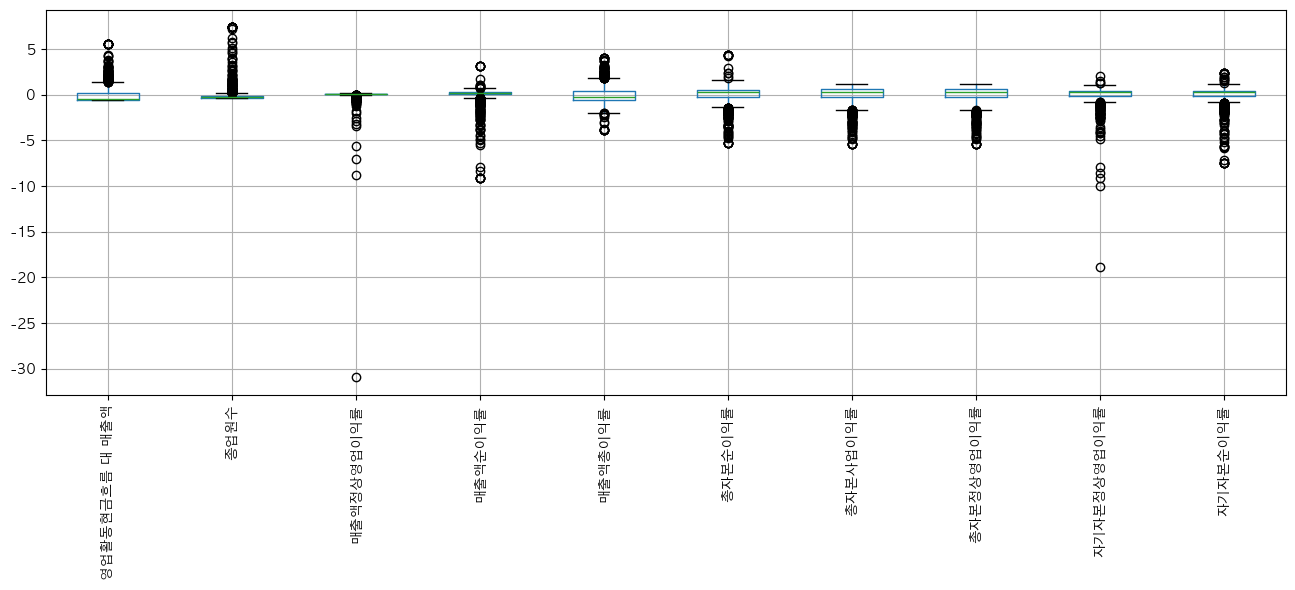

In [59]:
plt.figure(figsize=(16, 5))
X_train_scaled[cols_non_log[-10:]].boxplot()
plt.xticks(rotation=90)
# plt.title('Train set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(16, 5))
X_train_scaled_std[cols_non_log[-10:]].boxplot()
plt.xticks(rotation=90)
# plt.title('train set : standard 스케일링 후')
plt.show()

In [63]:
cols_scaling

['DGS10',
 'DGS1',
 'DGS6MO',
 'T10Y2Y',
 'WTI_oil',
 'Dubai_oil',
 'realGDP_usa',
 'real_PCE',
 'Core_PCE',
 'CPI_sticky',
 'Core_CPI',
 'manuf_PMI(R)',
 'non_manuf_PMI(R)',
 'Equip_inv',
 'TB_rtn(1y)',
 'TB_rtn(10y)',
 'IR_sm',
 'DXY',
 'CB_spread(AA-)',
 'CB_spread(BBB-)',
 '경제고통지수',
 '경상수지',
 '수입금액지수',
 '수입물량지수',
 '수출금액지수',
 '수출물량지수',
 '미국수입금액',
 '중국수입금액',
 '미국수출금액',
 '중국수출금액',
 '실업률',
 '실업률_증감',
 '소비자물가상승률',
 '근원물가상승률',
 '근원물가상승률_식품에너지제외',
 'GDP_growth',
 'CLI(경기선행)',
 'CCI(경기동행)',
 'NSI(=뉴스심리지수)',
 '기업실사BSI_실적',
 '기업실사BSI_전망',
 '자산증가율',
 '유형자산증가율',
 '유동자산증가율',
 '재고자산증가율',
 '자본증가율',
 '매출액증가율',
 '총자산회전율',
 '배당수익률',
 '감가상각율',
 '순외환손익대비매출액',
 '매출원가대비매출액',
 '변동비대비매출액',
 '고정비대비매출액',
 '인건비대비매출액',
 '인건비대비영업총비용',
 '영업현금흐름대비투하자본',
 'ROTCE현금흐름대체',
 '유형자산대비현금흐름',
 '유무형자산대비현금흐름',
 '매출대비고정자산',
 '유동비율',
 '현금비율',
 '당좌비율',
 '자기자본비율',
 '비유동비율',
 '부채비율',
 '유동부채비율',
 '비유동부채비율',
 '비유동장기적합률',
 '차입금의존도',
 '매출채권대비매입채무',
 '순운전자본대비총자본',
 '차입금대비매출액',
 '영업활동현금흐름 대 총부채',
 '자기자본회전율',
 '자본금회전율',
 '경영자산회전율',
 '

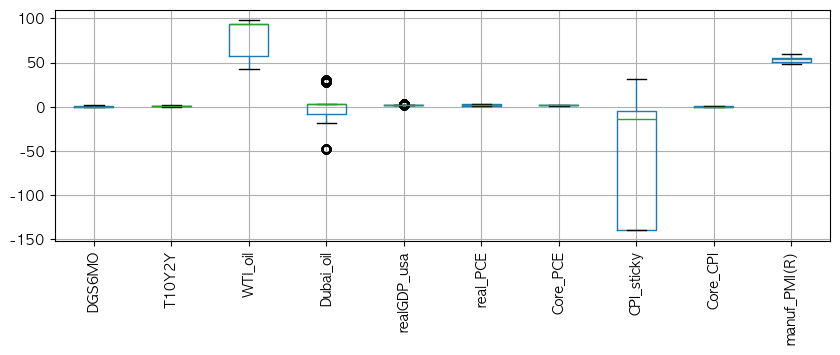

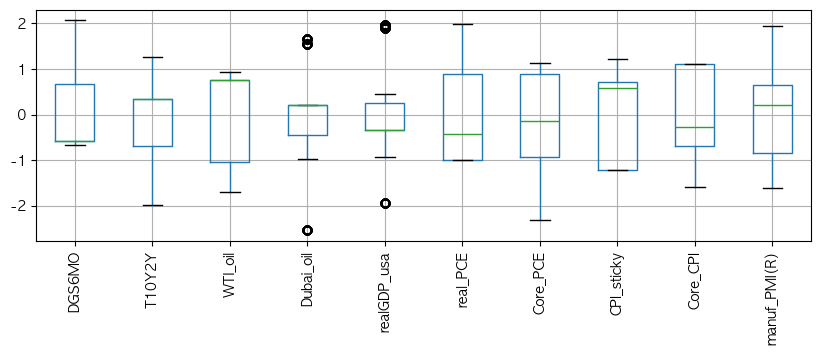

In [69]:
plt.figure(figsize=(10, 3))
X_train_scaled[cols_scaling[2:12]].boxplot()
plt.xticks(rotation=90)
# plt.title('Train set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(10, 3))
X_train_scaled_std[cols_scaling[2:12]].boxplot()
plt.xticks(rotation=90)
# plt.title('train set : standard 스케일링 후')
plt.show()

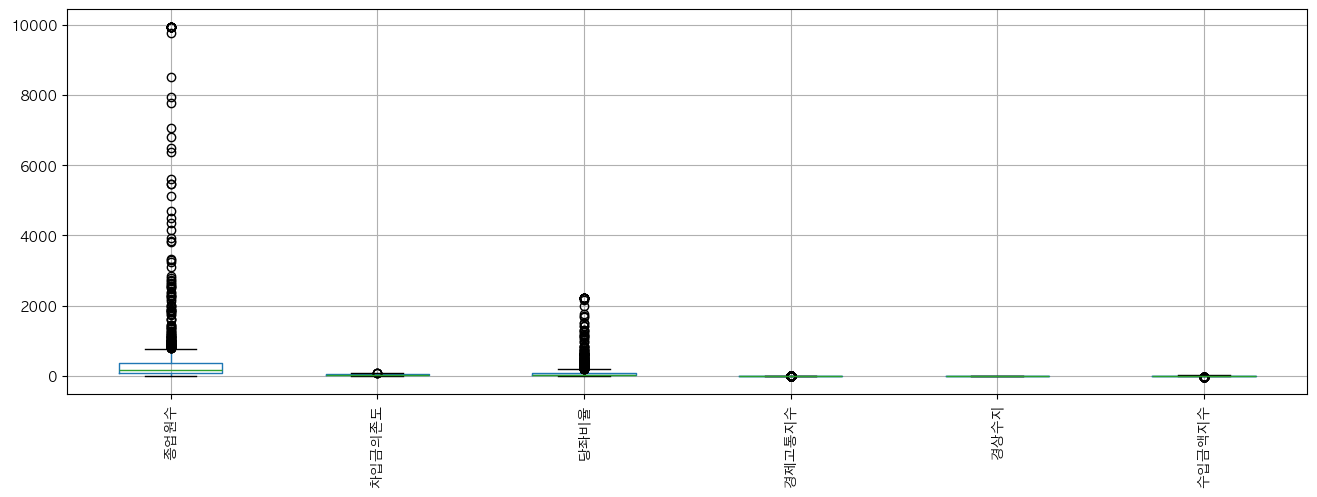

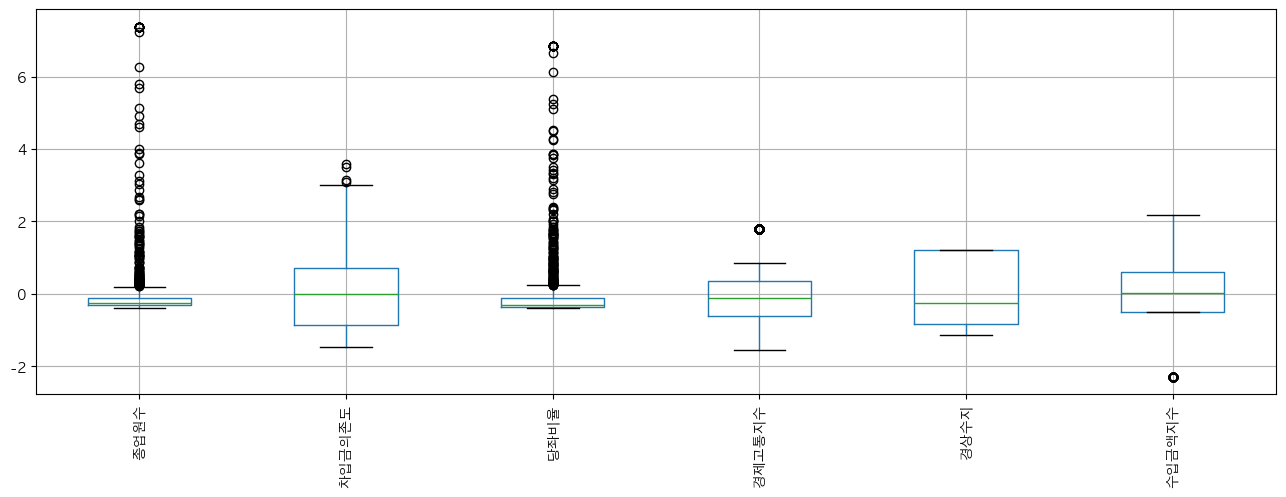

In [65]:
plt.figure(figsize=(16, 5))
X_train_scaled[['종업원수', '차입금의존도', '당좌비율', '경제고통지수', '경상수지', '수입금액지수']].boxplot()
plt.xticks(rotation=90)
# plt.title('Train set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(16, 5))
X_train_scaled_std[['종업원수', '차입금의존도', '당좌비율', '경제고통지수', '경상수지', '수입금액지수']].boxplot()
plt.xticks(rotation=90)
# plt.title('train set : standard 스케일링 후')
plt.show()

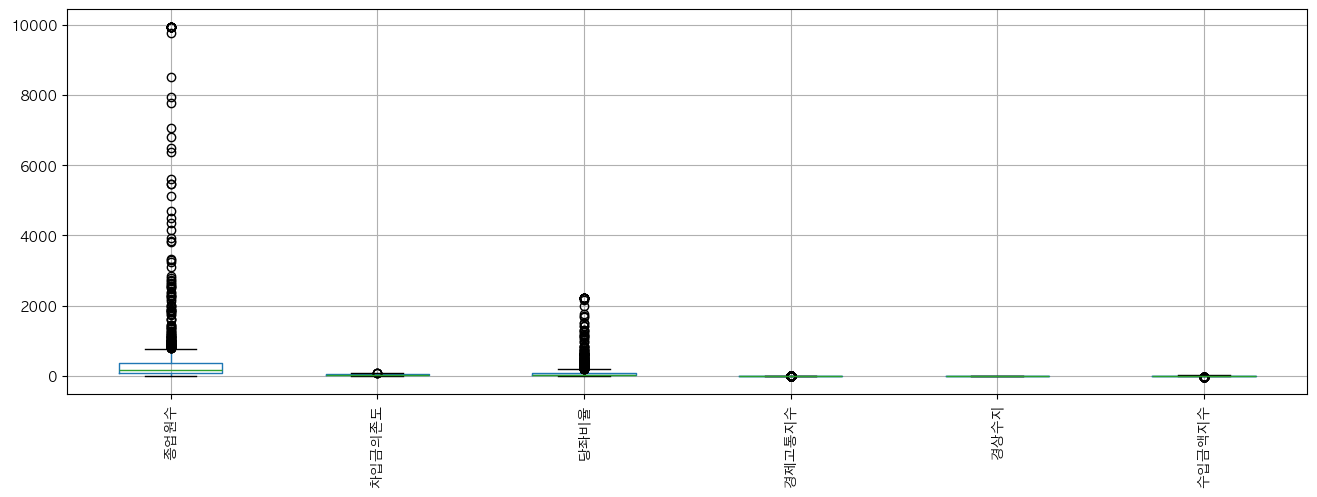

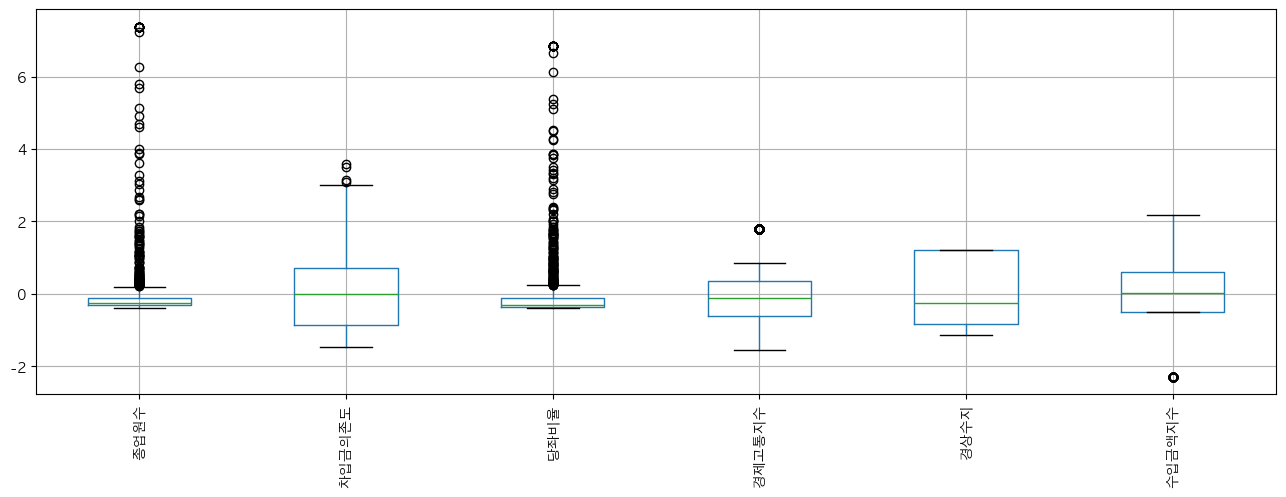

In [ ]:
plt.figure(figsize=(16, 5))
X_train_scaled[['종업원수', '차입금의존도', '당좌비율', '경제고통지수', '경상수지', '수입금액지수']].boxplot()
plt.xticks(rotation=90)
# plt.title('Train set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(16, 5))
X_train_scaled_std[['종업원수', '차입금의존도', '당좌비율', '경제고통지수', '경상수지', '수입금액지수']].boxplot()
plt.xticks(rotation=90)
# plt.title('train set : standard 스케일링 후')
plt.show()

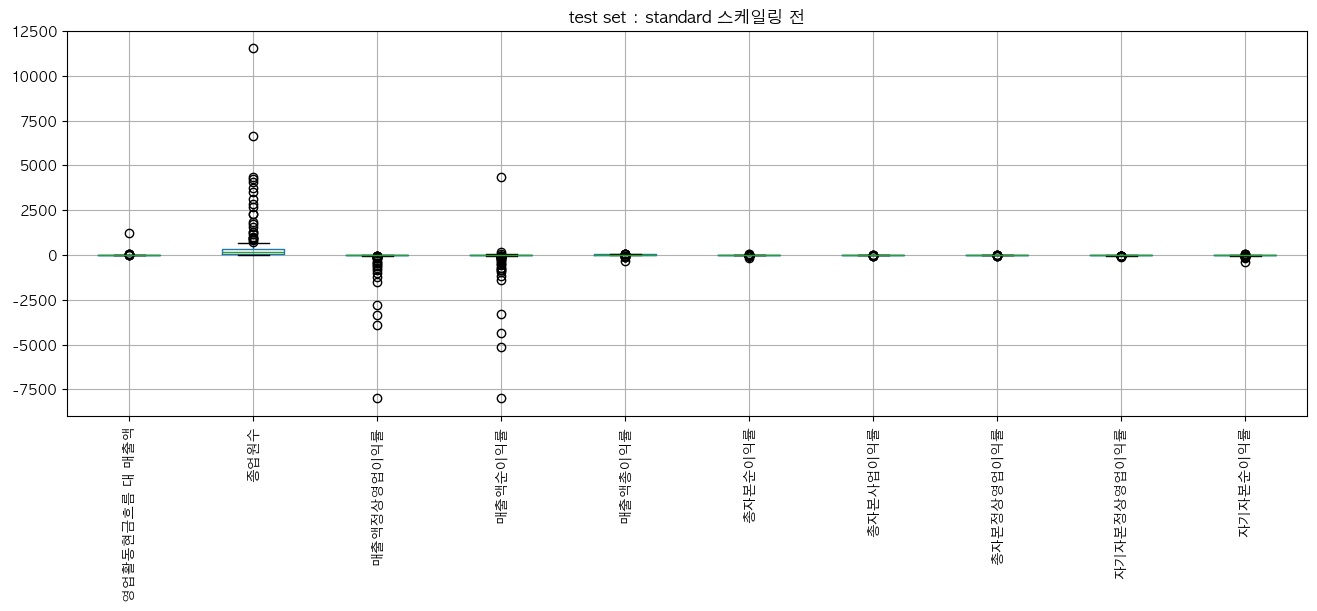

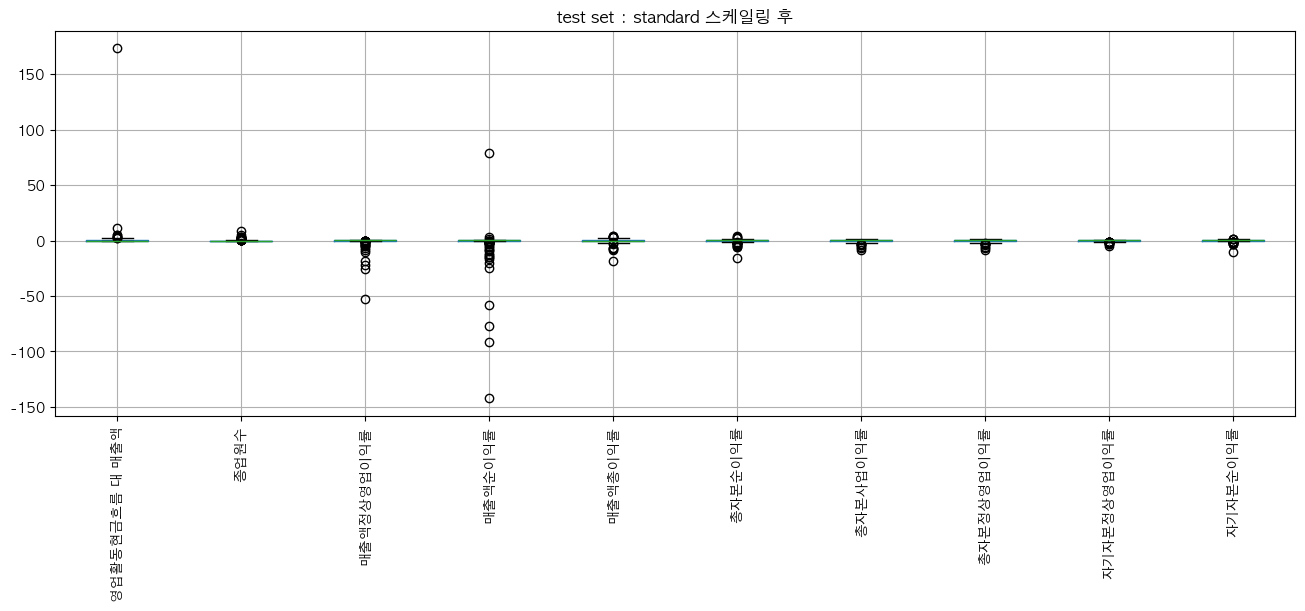

In [61]:
plt.figure(figsize=(16, 5))
X_test_scaled[cols_non_log[-10:]].boxplot()
plt.xticks(rotation=90)
plt.title('test set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(16, 5))
X_test_scaled_std[cols_non_log[-10:]].boxplot()
plt.xticks(rotation=90)
plt.title('test set : standard 스케일링 후')
plt.show()

In [62]:
# ## 파일로 저장
# X_train_scaled_std.to_csv('../data/dataset/X_train_scaled_std.csv')
# X_test_scaled_std.to_csv('../data/dataset/X_test_scaled_std.csv')

### minmax : `cols_mm`

In [63]:
from sklearn.preprocessing import MinMaxScaler

# 데이터프레임 복사
cols_mm = cols_scaling

X_train_scaled_mm = X_train_scaled.copy()
X_test_scaled_mm = X_test_scaled.copy()

scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train_scaled_mm[cols_mm])

X_train_scaled_mm[cols_mm] = scaler_mm.transform(X_train_scaled_mm[cols_mm])
X_test_scaled_mm[cols_mm] = scaler_mm.transform(X_test_scaled_mm[cols_mm])

In [64]:
X_train_scaled_mm.shape, X_test_scaled_mm.shape

((1187, 166), (198, 166))

In [65]:
# 파일로 저장

X_train_scaled_mm.to_csv('../data/dataset/X_train_scaled_mm.csv')
X_test_scaled_mm.to_csv('../data/dataset/X_test_scaled_mm.csv')

### robust : `cols_rb`

In [66]:
from sklearn.preprocessing import RobustScaler

# 데이터프레임 복사
cols_rb = cols_scaling
X_train_scaled_rb = X_train_scaled.copy()
X_test_scaled_rb = X_test_scaled.copy()

scaler_rb = RobustScaler()
scaler_rb.fit(X_train_scaled[cols_rb])

X_train_scaled_rb[cols_rb] = scaler_rb.transform(X_train_scaled[cols_rb])
X_test_scaled_rb[cols_rb] = scaler_rb.transform(X_test_scaled[cols_rb])

In [67]:
X_train_scaled_rb.shape, X_test_scaled_rb.shape

((1187, 166), (198, 166))

In [68]:
# 파일로 저장

X_train_scaled_rb.to_csv('../data/dataset/X_train_scaled_rb.csv')
X_test_scaled_rb.to_csv('../data/dataset/X_test_scaled_rb.csv')